## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
len(combined_results_df)


1893

In [2]:
# Checking the number of mice.
combined_results_df["Mouse ID"].unique()
mouse_count = len(combined_results_df["Mouse ID"].unique())
mouse_count

249

In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0


In [4]:
#Set index for main df
combined_results_df_index = combined_results_df.set_index("Mouse ID")
combined_results_df_index.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_results_df_index.loc["g989",]
data_for_dup = combined_results_df_index.loc["g989",]
data_for_dup

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_results_df_index.drop("g989")
clean_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
#Reset index for clean_df
clean_df.reset_index(inplace = True)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].unique()
new_mouse_count = len(clean_df["Mouse ID"].unique())
new_mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
#Create df with index for regimens
df_regimens = clean_df
df_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
#Define tumor volume values
tumor_vol = df_regimens[["Tumor Volume (mm3)"]].values
tumor_vol

array([[45.        ],
       [38.82589807],
       [35.01427146],
       ...,
       [69.17624607],
       [70.31490411],
       [73.86784476]])

In [15]:
#Define regimen values
regimens = df_regimens[["Drug Regimen"]].values
regimens

array([['Ramicane'],
       ['Ramicane'],
       ['Ramicane'],
       ...,
       ['Naftisol'],
       ['Naftisol'],
       ['Naftisol']], dtype=object)

In [16]:
#List of regimens
all_regimens = df_regimens["Drug Regimen"].unique()
all_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [17]:
#Calculate mean for each regimen
for_mean = [(i, tumor_vol[regimens==i].mean()) for i in all_regimens]
for_mean

[('Ramicane', 40.21674506671052),
 ('Capomulin', 40.675741141),
 ('Infubinol', 52.88479510859551),
 ('Placebo', 54.03358078635359),
 ('Ceftamin', 52.59117180960675),
 ('Stelasyn', 54.23314911988951),
 ('Zoniferol', 53.23650655159341),
 ('Ketapril', 55.23563764047873),
 ('Propriva', 52.32092986),
 ('Naftisol', 54.331564658333335)]

In [50]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [201]:
###This is what we got from Sumeet#Calculate SEM
sem_result =[]
for sem_val in all_regimens:
    sem_temp_df = clean_df[clean_df["Drug Regimen"]==val][["Drug Regimen", "Tumor Volume (mm3)"]]
    sem_result.append(temp_df.sem())
sem_result

[Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64,
 Tumor Volume (mm3)    0.596466
 dtype: float64]

In [46]:
df_regimens_group = df_regimens.groupby(["Drug Regimen"])
df_regimens_group.count().head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [63]:
###This is what we got from Sumeet
df_regimens_group.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [64]:
a = np.arange(5)
sts.sem(tumor_vol)

array([0.20559062])

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [125]:
df_regimens_group = df_regimens.groupby(["Drug Regimen"])
df_regimens_group.count().head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [127]:
timepoint_reg = df_regimens_group["Timepoint"].count()
timepoint_reg

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

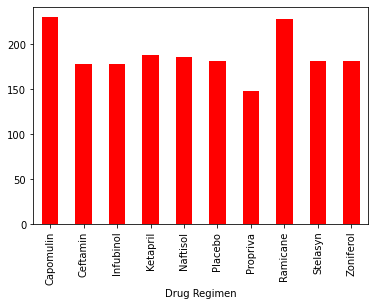

In [143]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
timepoint_chart_pyplot = timepoint_reg.plot(kind="bar", facecolor="red")
plt.show()

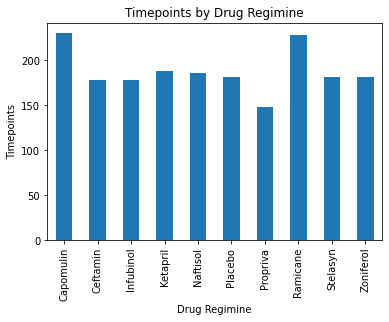

In [141]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
timepoint_chart_pandas = timepoint_reg.plot(kind = "bar", title="Timepoints by Drug Regimine")
timepoint_chart_pandas.set_xlabel("Drug Regimine")
timepoint_chart_pandas.set_ylabel("Timepoints")
plt.show()

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Get clean dataframe for pie chart
groupby_sex_df = clean_df.groupby(clean_df["Sex"])
print(f"The {groupby_sex_df.count().head(10)} , {groupby_sex_df.dtypes}")

The         Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex                                                                 
Female       922           922         922         922        922   
Male         958           958         958         958        958   

        Tumor Volume (mm3)  Metastatic Sites  
Sex                                           
Female                 922               922  
Male                   958               958   ,        Mouse ID Drug Regimen Age_months Weight (g) Timepoint  \
Sex                                                            
Female   object       object      int64      int64     int64   
Male     object       object      int64      int64     int64   

       Tumor Volume (mm3) Metastatic Sites  
Sex                                         
Female            float64            int64  
Male              float64            int64  


In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
groupby_sex = groupby_sex_df["Sex"].count()
groupby_sex

Sex
Female    922
Male      958
Name: Sex, dtype: int64

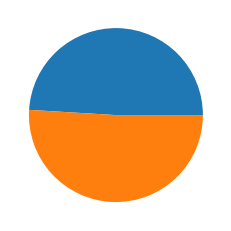

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
groupby_sex__pyplot_pie = plt.pie(groupby_sex)

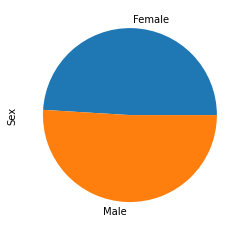

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_sex_pandas_pie = groupby_sex.plot(kind="pie", y="sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [147]:
df_for_iqr = clean_df
df_for_iqr.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [156]:
max_timepoint_df_group = df_for_iqr.groupby(df_for_iqr["Mouse ID"])
max_timepoint_df_group.count().head(10)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
a401,10,10,10,10,10,10,10
a411,10,10,10,10,10,10,10
a444,10,10,10,10,10,10,10
a457,3,3,3,3,3,3,3


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a366    63.440686
a401    66.794156
a411    45.466677
a444    45.000000
a457    49.783419
a492    60.122011
a520    45.000000
a577    57.031862
a644    46.910892
a685    66.083066
a699    62.191414
a788    60.413709
a818    74.997764
a897    72.255963
a963    62.765093
b128    45.651331
b313    55.745146
b447    45.000000
b487    56.057749
b559    73.051363
b742    45.000000
b759    55.742829
b879    72.555239
c139    72.226731
c264    67.942121
c282    65.815165
c302    64.575222
c326    45.000000
c402    74.040390
c458    45.722279
c559    61.840058
c580    58.046569
c757    69.042841
c758    46.940945
c766    69.823146
c819    62.175705
c832    65.415955
c895    60.969711
c927    64.183229
d133    45.000000
d164    47.474645
d251    45.000000
d474    60.233733
e213    63.105696
e227    73.212939
e291    55.138953
e476    62.435404
e584    68.359777
e662    46.409084
f129    49.988302
f234    57.748758
f

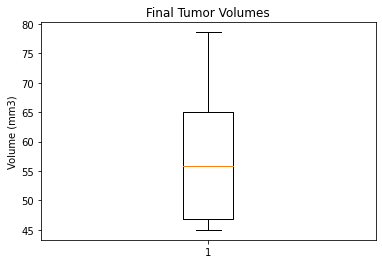

In [265]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes")
ax1.set_ylabel("Volume (mm3)")
ax1.boxplot(tumor_vol)
plt.show()

In [269]:
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [271]:
print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

The lower quartile of tumor volumes is: 46.8854749175
The upper quartile of tumor volumes is: 65.05362410500001
The interquartile range of tumor volumes is: 18.168149187500013
The the median of tumor volumes is: 55.793278175 


In [272]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 19.633251136249978 could be outliers.
Values above 92.30584788625004 could be outliers.


In [278]:
outlier_volumes = (max_timepoint["Tumor Volume (mm3)"] < lower_bound) | (max_timepoint["Tumor Volume (mm3)"] > upper_bound)
outlier_volumes.value_counts()

False    248
Name: Tumor Volume (mm3), dtype: int64

In [184]:
pd.set_option('display.max_rows', 300)

In [186]:
merged_df = df_for_iqr.merge(max_timepoint, how="inner", on ="Mouse ID")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [187]:
# renaming the column "A" 
merged_df.rename(columns = {"Timepoint_y": "Max Timepoint"},  
          inplace = True) 
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [295]:
merged_df.max(level='Max Timepoint')

ValueError: level name Max Timepoint is not the name of the index

In [294]:
merged_df_consolidated = merged_df.loc[:, ["Mouse ID", "Max Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
merged_df_consolidated

,Mouse ID,Max Timepoint,Drug Regimen,Tumor Volume (mm3)
0,k403,45,Ramicane,45.000000
1,k403,45,Ramicane,38.825898
2,k403,45,Ramicane,35.014271
3,k403,45,Ramicane,34.223992
4,k403,45,Ramicane,32.997729
...,...,...,...,...
1875,z969,45,Naftisol,63.145652
1876,z969,45,Naftisol,65.841013
1877,z969,45,Naftisol,69.176246
1878,z969,45,Naftisol,70.314904


In [192]:
merged_df_by_reg = merged_df.groupby(merged_df["Mouse ID"])
merged_df_by_reg.count().head(10)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Mouse ID,,,,,,,,
a203,10,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7,7
a401,10,10,10,10,10,10,10,10
a411,10,10,10,10,10,10,10,10
a444,10,10,10,10,10,10,10,10
a457,3,3,3,3,3,3,3,3


In [168]:
top_4_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_4_regimens

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [297]:
#For loop to get the max tumor volume by drug
for_tumor_volume =[]
for maxtime in top_4_regimens:
    temp_df_for_max = merged_df[merged_df["Drug Regimen"]==maxtime][["Mouse ID", "Drug Regimen", "Max Timepoint", "Timepoint_x", "Tumor Volume (mm3)"]]
    for_tumor_volume.append(temp_df_for_max)
for_tumor_volume

[     Mouse ID Drug Regimen  Max Timepoint  Timepoint_x  Tumor Volume (mm3)
 10       s185    Capomulin             45            0           45.000000
 11       s185    Capomulin             45            5           43.878496
 12       s185    Capomulin             45           10           37.614948
 13       s185    Capomulin             45           15           38.177232
 14       s185    Capomulin             45           20           36.866876
 15       s185    Capomulin             45           25           33.949940
 16       s185    Capomulin             45           30           32.959671
 17       s185    Capomulin             45           35           28.328531
 18       s185    Capomulin             45           40           25.472143
 19       s185    Capomulin             45           45           23.343598
 20       x401    Capomulin             45            0           45.000000
 21       x401    Capomulin             45            5           45.473753
 22       x4

In [305]:
for_final_vol =[]
for i in for_tumor_volume:
    tempdf_for_final_volume = for_tumor_volume["Max Timepoint" == "Timepoint_x"]["Mouse ID"]
    for_final_vol.append(tempdf_for_final_volume)
for_final_vol

[10      s185
 11      s185
 12      s185
 13      s185
 14      s185
 15      s185
 16      s185
 17      s185
 18      s185
 19      s185
 20      x401
 21      x401
 22      x401
 23      x401
 24      x401
 25      x401
 26      x401
 27      x401
 28      x401
 29      x401
 30      m601
 31      m601
 32      m601
 33      m601
 34      m601
 35      m601
 36      m601
 37      m601
 38      m601
 39      m601
 60      f966
 61      f966
 62      f966
 63      f966
 64      f966
 95      u364
 96      u364
 97      u364
 98      u364
 99      u364
 100     u364
 101     u364
 102     u364
 103     u364
 104     u364
 115     y793
 116     y793
 117     y793
 118     y793
 119     y793
 120     y793
 121     y793
 122     y793
 123     y793
 124     y793
 125     r554
 126     r554
 127     r554
 128     r554
 129     r554
 130     r554
 131     r554
 132     r554
 133     r554
 134     r554
 135     m957
 136     m957
 137     m957
 138     m957
 139     m957
 140     m957
 141  

In [167]:
# Put treatments into a list for for loop (and later for plot labels)
max_timepoint_list = max_timepoint.values.tolist()
max_timepoint_list

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[45,
 45,
 45,
 45,
 30,
 45,
 45,
 45,
 10,
 45,
 45,
 30,
 45,
 45,
 45,
 30,
 45,
 45,
 45,
 45,
 25,
 0,
 25,
 45,
 45,
 30,
 45,
 45,
 45,
 45,
 45,
 5,
 45,
 30,
 45,
 30,
 45,
 45,
 45,
 40,
 45,
 30,
 40,
 0,
 10,
 45,
 40,
 45,
 45,
 25,
 45,
 45,
 45,
 15,
 35,
 5,
 45,
 5,
 15,
 45,
 0,
 20,
 20,
 35,
 45,
 45,
 45,
 45,
 40,
 45,
 45,
 15,
 45,
 30,
 0,
 5,
 45,
 45,
 40,
 10,
 45,
 45,
 25,
 45,
 45,
 45,
 20,
 35,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 20,
 20,
 20,
 35,
 45,
 45,
 10,
 10,
 45,
 30,
 45,
 10,
 45,
 45,
 45,
 45,
 0,
 45,
 25,
 45,
 15,
 45,
 45,
 45,
 45,
 5,
 45,
 45,
 45,
 0,
 5,
 30,
 10,
 40,
 40,
 15,
 45,
 30,
 45,
 10,
 45,
 15,
 45,
 35,
 5,
 0,
 45,
 40,
 45,
 45,
 25,
 40,
 45,
 35,
 10,
 30,
 40,
 45,
 35,
 45,
 35,
 45,
 45,
 30,
 15,
 45,
 45,
 45,
 45,
 15,
 30,
 45,
 25,
 30,
 25,
 10,
 45,
 30,
 45,
 45,
 45,
 5,
 45,
 45,
 45,
 45,
 0,
 45,
 45,
 20,
 25,
 0,
 45,
 45,
 45,
 20,
 0,
 25,
 40,
 5,
 10,
 35,
 20,
 15,
 15,
 20,

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
